In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium

In [138]:
!ls

Data                             capstone_TimeSeries-Copy1.ipynb
LICENSE                          capstone_TimeSeries.ipynb
README.md                        capstone_TimeSeries_hourly.ipynb
capstone_EDA.ipynb


In [139]:
# 2017 data
df_2017_q1 = pd.read_csv('Data/la_metro_gbfs_trips_Q1_2017.csv')
df_2017_q2 = pd.read_csv('Data/la_metro_gbfs_trips_Q2_2017.csv')
df_2017_q3 = pd.read_csv('Data/metro-bike-share-trips-2017-q3.csv')
df_2017_q4 = pd.read_csv('Data/metro-bike-share-trips-2017-q4-v2.csv')
# 2018 data
df_2018_q1 = pd.read_csv('Data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('Data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('Data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('Data/metro-bike-share-trips-2018-q4.csv')
# 2019 data
df_2019_q1 = pd.read_csv('Data/metro-bike-share-trips-2019-q1.csv')
df_2019_q2 = pd.read_csv('Data/metro-bike-share-trips-2019-q2.csv')
#  = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv') # station_df

In [140]:
print(df_2017_q1.shape)
print(df_2018_q1.shape)
print(df_2018_q4.shape)
print(df_2019_q2.shape)

(33786, 14)
(65387, 14)
(73867, 15)
(64545, 15)


In [141]:
print(df_2017_q1.columns)
print(df_2018_q1.columns)
print(df_2019_q2.columns)

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type'],
      dtype='object')


In [142]:
# df = df_2019_q2
# df = pd.concat([df_2019_q1, df_2019_q2])
df = pd.concat([df_2017_q1, df_2017_q2, df_2017_q3, df_2017_q4 ,df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, df_2019_q1, df_2019_q2])
# df = pd.concat([df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, df_2019_q1, df_2019_q2])
print(df.shape)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(663052, 17)


In [143]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_station_id,start_time,trip_id,trip_route_category
0,6220,NaN,480,34.048851,-118.246422,NaN,3029.0,1/1/2017 0:23,Monthly Pass,30.0,34.051941,-118.243530,NaN,3030.0,1/1/2017 0:15,17059131,One Way
1,6351,NaN,720,34.058319,-118.246094,NaN,3028.0,1/1/2017 0:36,Walk-up,0.0,34.058319,-118.246094,NaN,3028.0,1/1/2017 0:24,17059130,Round Trip
2,5836,NaN,1020,34.043732,-118.260139,NaN,3018.0,1/1/2017 0:45,Walk-up,0.0,34.049980,-118.247162,NaN,3027.0,1/1/2017 0:28,17059129,One Way
3,6142,NaN,300,34.044701,-118.252441,NaN,3031.0,1/1/2017 0:43,Monthly Pass,30.0,34.050480,-118.254593,NaN,3007.0,1/1/2017 0:38,17059128,One Way
4,6135,NaN,300,34.044701,-118.252441,NaN,3031.0,1/1/2017 0:43,Monthly Pass,30.0,34.050480,-118.254593,NaN,3007.0,1/1/2017 0:38,17059127,One Way


In [144]:
# df = pd.read_csv('Data/metro-bike-share-trips-2019-q2.csv')

In [145]:
df.passholder_type.unique()

array(['Monthly Pass', 'Walk-up', 'Flex Pass', 'One Day Pass',
       'Annual Pass', 'Testing'], dtype=object)

In [146]:
df['Date'] = pd.DatetimeIndex(df['start_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663052 entries, 0 to 64544
Data columns (total 18 columns):
bike_id                663052 non-null object
bike_type              195770 non-null object
duration               663052 non-null int64
end_lat                650428 non-null float64
end_lon                650428 non-null float64
end_station            629266 non-null float64
end_station_id         33786 non-null float64
end_time               663052 non-null object
passholder_type        663052 non-null object
plan_duration          662668 non-null float64
start_lat              660131 non-null float64
start_lon              660131 non-null float64
start_station          629266 non-null float64
start_station_id       33786 non-null float64
start_time             663052 non-null object
trip_id                663052 non-null int64
trip_route_category    663052 non-null object
Date                   663052 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(2), 

In [147]:
df['bike_type'].fillna(0, inplace=True)

In [148]:
df['start_station_id'].fillna(0, inplace=True)

In [149]:
df['end_station_id'].fillna(0, inplace=True)

In [150]:
df['end_station'].fillna(0, inplace=True)

In [151]:
df['start_station'].fillna(0, inplace=True)

In [152]:
df.isna().sum()

bike_id                    0
bike_type                  0
duration                   0
end_lat                12624
end_lon                12624
end_station                0
end_station_id             0
end_time                   0
passholder_type            0
plan_duration            384
start_lat               2921
start_lon               2921
start_station              0
start_station_id           0
start_time                 0
trip_id                    0
trip_route_category        0
Date                       0
dtype: int64

In [153]:
df.dropna(inplace=True)

In [154]:
df['dayName'] = pd.DatetimeIndex(df['start_time']).weekday
df['hour'] = pd.DatetimeIndex(df['start_time']).hour
df['minute'] = pd.DatetimeIndex(df['start_time']).minute

In [155]:
# df['daytime'] = pd.timedelta_range(0, periods=9, freq="2H30T")

In [156]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,start_station,start_station_id,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,-118.243530,0.0,3030.0,1/1/2017 0:15,17059131,One Way,2017-01-01 00:15:00,6,0,15
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,-118.246094,0.0,3028.0,1/1/2017 0:24,17059130,Round Trip,2017-01-01 00:24:00,6,0,24
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,-118.247162,0.0,3027.0,1/1/2017 0:28,17059129,One Way,2017-01-01 00:28:00,6,0,28
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059128,One Way,2017-01-01 00:38:00,6,0,38
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059127,One Way,2017-01-01 00:38:00,6,0,38


In [157]:
df['dayName'].value_counts()

4    98995
1    94703
3    94508
2    93274
5    90469
0    89647
6    86914
Name: dayName, dtype: int64

In [158]:
# plot two starting and end points in the map then use plt.save(frame ) to save img per frame. 
# Also find dots in beteween starting and end point by using linspace.
df.head()


,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,start_station,start_station_id,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,-118.243530,0.0,3030.0,1/1/2017 0:15,17059131,One Way,2017-01-01 00:15:00,6,0,15
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,-118.246094,0.0,3028.0,1/1/2017 0:24,17059130,Round Trip,2017-01-01 00:24:00,6,0,24
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,-118.247162,0.0,3027.0,1/1/2017 0:28,17059129,One Way,2017-01-01 00:28:00,6,0,28
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059128,One Way,2017-01-01 00:38:00,6,0,38
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059127,One Way,2017-01-01 00:38:00,6,0,38


In [159]:
df.hour.value_counts()

17    59721
16    53821
18    50250
13    47177
12    46883
15    45307
14    43995
19    39558
11    37445
8     35496
9     32002
10    29510
20    28258
7     22793
21    21123
22    15429
23    10625
6      9293
0      6752
1      4535
2      2840
5      2757
3      1536
4      1404
Name: hour, dtype: int64

In [160]:
# sns.boxplot(x=df.hour, y=mon_df.groupby(['hour'])['dayName'].count());

In [161]:
# mon_df.hour.value_counts()

In [162]:
mon_df = df.loc[df['dayName']==0]
tue_df = df.loc[df['dayName']==1]
wed_df = df.loc[df['dayName']==2]
thur_df = df.loc[df['dayName']==3]
fri_df = df.loc[df['dayName']==4]
sat_df = df.loc[df['dayName']==5]
sun_df = df.loc[df['dayName']==6]

In [163]:
# plt.plot.line()

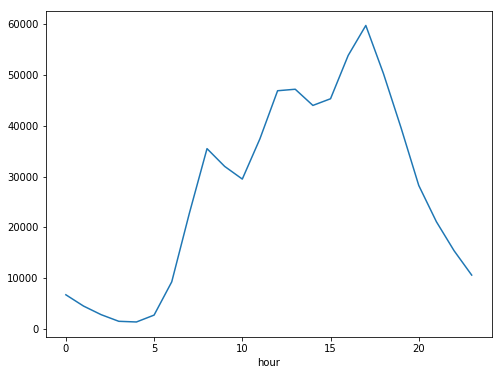

In [164]:
df.groupby(['hour'])['dayName'].count().plot.line(figsize = (8, 6))

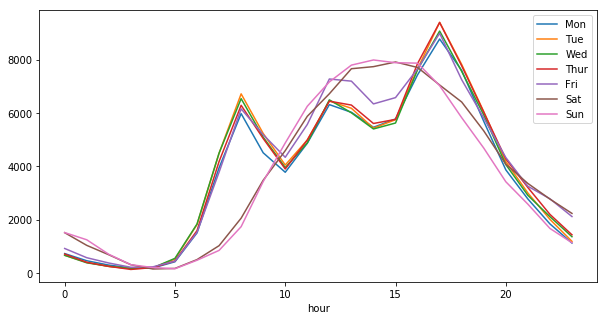

In [165]:
mon_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Mon')
tue_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Tue')
wed_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Wed')
thur_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Thur')
fri_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Fri')
sat_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sat')
sun_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sun')

plt.legend();

Each station must have its own temporal profile, a characteristic time-series that says something about how and when that station is used.  If a station peaks early in the weekday morning and then never again, it could mean that this stations primary purpose is transporting people to work. Likewise if a station peaks at 6pm but never again then it could be considered an evening commute station. Other patterns might also exists that lend themselves to easy interpretation.

- Most of the trips start after work hours (between 17.00 and 19.00)
- Lunch time is also active (between 12.00 and 14.00)
- Trip again peaks at 6pm considering an evening commute.   
- It seems everybody sleeps after midnight, between 00.00 and 07.00 is the least active time.

In [166]:
df.start_station.unique()

array([   0., 3047., 3005., 3023., 3051., 3007., 3075., 3066., 3082.,
       3064., 3052., 3029., 3006., 3018., 3035., 3032., 3030., 3074.,
       3022., 3069., 3042., 3026., 3054., 3079., 3024., 3038., 3037.,
       3062., 3068., 3058., 3067., 3040., 3055., 3036., 3056., 3060.,
       3008., 3031., 3034., 3063., 3077., 3048., 3049., 3016., 3014.,
       3011., 3076., 3033., 4108., 3027., 3019., 3046., 3010., 3020.,
       3025., 3080., 3028., 3065., 3057., 3045., 3081., 3078., 4155.,
       4156., 4176., 4150., 4177., 4151., 4169., 4148., 4170., 4162.,
       4143., 4142., 3061., 4163., 4157., 4183., 4181., 4138., 4165.,
       4144., 4159., 4146., 4160., 4167., 3039., 4147., 4149., 4153.,
       4158., 4154., 4152., 4174., 4166., 4125., 4136., 4134., 4129.,
       4132., 4133., 4126., 4127., 4130., 4180., 4194., 4131., 4135.,
       3013., 4205., 4212., 4208., 4206., 4207., 4214., 4216., 4210.,
       4215., 4209., 4211., 4202., 4204., 4213., 4220., 4227., 4244.,
       4254., 4249.,

In [167]:
# def get_base_map(df):
#     return folium.Map(location=[df.start_lat.mean(),
#                              df.start_lon.mean()],
#                    zoom_start=14,
#                    tiles='cartodbpositron')

# #base map
# base = get_base_map(df)
# base

In [168]:
df = df.rename(columns={'start_station': 'Station_ID'})

In [169]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,Station_ID,start_station_id,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,-118.243530,0.0,3030.0,1/1/2017 0:15,17059131,One Way,2017-01-01 00:15:00,6,0,15
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,-118.246094,0.0,3028.0,1/1/2017 0:24,17059130,Round Trip,2017-01-01 00:24:00,6,0,24
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,-118.247162,0.0,3027.0,1/1/2017 0:28,17059129,One Way,2017-01-01 00:28:00,6,0,28
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059128,One Way,2017-01-01 00:38:00,6,0,38
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059127,One Way,2017-01-01 00:38:00,6,0,38


In [170]:
# def add_station_markers(initial_map, df):
#     #station location visualization
#     statdf = df.drop_duplicates(subset=['Station_ID'])
#     out_map = initial_map
#     for lat, lon, name in zip(statdf['start_lat'], statdf['start_lon'], statdf['Station_ID']):
#         out_map.add_child(folium.Marker(location=[lat,lon], popup=(folium.Popup(name, max_width=1000, ))))
#     return out_map

# markers = add_station_markers(base, df)
# markers

In [171]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,Station_ID,start_station_id,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,-118.243530,0.0,3030.0,1/1/2017 0:15,17059131,One Way,2017-01-01 00:15:00,6,0,15
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,-118.246094,0.0,3028.0,1/1/2017 0:24,17059130,Round Trip,2017-01-01 00:24:00,6,0,24
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,-118.247162,0.0,3027.0,1/1/2017 0:28,17059129,One Way,2017-01-01 00:28:00,6,0,28
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059128,One Way,2017-01-01 00:38:00,6,0,38
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,-118.254593,0.0,3007.0,1/1/2017 0:38,17059127,One Way,2017-01-01 00:38:00,6,0,38


In [172]:
stations_df = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv')
stations_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,Central LA,Active
2,3006,Olive & 8th,7/7/2016,Central LA,Active
3,3007,5th & Grand,7/7/2016,Central LA,Active
4,3008,Figueroa & 9th,7/7/2016,Central LA,Active


In [173]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
Station_ID      206 non-null int64
Station_Name    206 non-null object
Go_live_date    206 non-null object
Region          205 non-null object
Status          206 non-null object
dtypes: int64(1), object(4)
memory usage: 8.1+ KB


In [174]:
stations_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,Central LA,Active
2,3006,Olive & 8th,7/7/2016,Central LA,Active
3,3007,5th & Grand,7/7/2016,Central LA,Active
4,3008,Figueroa & 9th,7/7/2016,Central LA,Active


In [175]:
stations_df = stations_df.loc[~stations_df['Region '].isna()]

In [176]:
stations_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
1,3005,7th & Flower,7/7/2016,Central LA,Active
2,3006,Olive & 8th,7/7/2016,Central LA,Active
3,3007,5th & Grand,7/7/2016,Central LA,Active
4,3008,Figueroa & 9th,7/7/2016,Central LA,Active
5,3010,11th & Maple,7/10/2016,Central LA,Active


In [177]:
df.loc[df['Station_ID'] == 4108]

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_station_id,end_time,passholder_type,plan_duration,...,start_lon,Station_ID,start_station_id,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
189,4728,0,3,34.025890,-118.238243,4108.0,0.0,2017-06-14 11:44:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-14 11:41:00,31414368,Round Trip,2017-06-14 11:41:00,2,11,41
190,4728,0,28,34.056610,-118.237213,3014.0,0.0,2017-06-15 14:29:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-15 14:01:00,31556650,One Way,2017-06-15 14:01:00,3,14,1
191,4728,0,14,34.025890,-118.238243,4108.0,0.0,2017-06-18 15:28:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-18 15:14:00,31949481,Round Trip,2017-06-18 15:14:00,6,15,14
1384,5738,0,1,34.025890,-118.238243,4108.0,0.0,2017-06-12 13:57:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-12 13:56:00,31181469,Round Trip,2017-06-12 13:56:00,0,13,56
1385,5738,0,20,34.046810,-118.256981,3064.0,0.0,2017-06-12 18:09:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-12 17:49:00,31208128,One Way,2017-06-12 17:49:00,0,17,49
2660,5766,0,38,34.025890,-118.238243,4108.0,0.0,2017-04-11 13:28:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-04-11 12:50:00,24649626,Round Trip,2017-04-11 12:50:00,1,12,50
2661,5766,0,10,34.025890,-118.238243,4108.0,0.0,2017-04-11 19:51:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-04-11 19:41:00,24673096,Round Trip,2017-04-11 19:41:00,1,19,41
4302,5799,0,3,34.025890,-118.238243,4108.0,0.0,2017-04-22 19:07:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-04-22 19:04:00,25644949,Round Trip,2017-04-22 19:04:00,5,19,4
4303,5799,0,10,34.025890,-118.238243,4108.0,0.0,2017-04-22 21:46:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-04-22 21:36:00,25652979,Round Trip,2017-04-22 21:36:00,5,21,36
8533,5870,0,16,34.046822,-118.248352,3038.0,0.0,2017-06-09 15:28:00,Monthly Pass,30.0,...,-118.238243,4108.0,0.0,2017-06-09 15:12:00,30825328,One Way,2017-06-09 15:12:00,4,15,12


In [178]:
# df = df.rename(columns={'start_station': 'Station_ID'})
# rename features to merge them 
merged_df = df.merge(stations_df, how='left', on='Station_ID')
merged_df = merged_df.rename(columns={'Station_ID': 'starting_station_id',
                                     'Station_Name': 'station_name_start',
                                     'Region ': 'region_start'})

merged_df = merged_df.rename(columns={'end_station': 'Station_ID'})
merged_df = merged_df.merge(stations_df, on='Station_ID', how='left')
merged_df = merged_df.rename(columns={'Station_ID': 'ending_station_id',
                                     'Station_Name': 'station_name_end',
                                     'Region ': 'region_end'})

In [179]:
print(merged_df.shape)
merged_df.columns

(648510, 29)


Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'Date', 'dayName', 'hour', 'minute', 'station_name_start',
       'Go_live_date_x', 'region_start', 'Status_x', 'station_name_end',
       'Go_live_date_y', 'region_end', 'Status_y'],
      dtype='object')

In [180]:
del merged_df['Go_live_date_x'], merged_df['Go_live_date_y'], merged_df['Status_x'], merged_df['Status_y']

In [181]:
merged_df.columns

Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'Date', 'dayName', 'hour', 'minute', 'station_name_start',
       'region_start', 'station_name_end', 'region_end'],
      dtype='object')

In [182]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,17059131,One Way,2017-01-01 00:15:00,6,0,15,NaN,NaN,NaN,NaN
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,17059130,Round Trip,2017-01-01 00:24:00,6,0,24,NaN,NaN,NaN,NaN
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,17059129,One Way,2017-01-01 00:28:00,6,0,28,NaN,NaN,NaN,NaN
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,17059128,One Way,2017-01-01 00:38:00,6,0,38,NaN,NaN,NaN,NaN
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,17059127,One Way,2017-01-01 00:38:00,6,0,38,NaN,NaN,NaN,NaN


In [183]:
merged_df['route'] = merged_df.station_name_start + '-->' + merged_df.station_name_end

In [184]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
0,6220,0,480,34.048851,-118.246422,0.0,3029.0,1/1/2017 0:23,Monthly Pass,30.0,...,One Way,2017-01-01 00:15:00,6,0,15,NaN,NaN,NaN,NaN,NaN
1,6351,0,720,34.058319,-118.246094,0.0,3028.0,1/1/2017 0:36,Walk-up,0.0,...,Round Trip,2017-01-01 00:24:00,6,0,24,NaN,NaN,NaN,NaN,NaN
2,5836,0,1020,34.043732,-118.260139,0.0,3018.0,1/1/2017 0:45,Walk-up,0.0,...,One Way,2017-01-01 00:28:00,6,0,28,NaN,NaN,NaN,NaN,NaN
3,6142,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,One Way,2017-01-01 00:38:00,6,0,38,NaN,NaN,NaN,NaN,NaN
4,6135,0,300,34.044701,-118.252441,0.0,3031.0,1/1/2017 0:43,Monthly Pass,30.0,...,One Way,2017-01-01 00:38:00,6,0,38,NaN,NaN,NaN,NaN,NaN


In [185]:
print(merged_df.region_start.unique())
print(merged_df.shape)


[nan 'Central LA' 'Pasadena' 'Port of LA' 'Westside']
(648510, 26)


In [186]:
merged_df = merged_df.loc[~merged_df['region_start'].isna()]

In [187]:
merged_df.loc[merged_df['region_start'] == 'Port of LA']

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
94139,6153,0,1,33.766659,-118.261017,4125.0,0.0,7/18/2017 12:16,Monthly Pass,30.0,...,Round Trip,2017-07-18 12:15:00,1,12,15,Banning's Landing,Port of LA,Banning's Landing,Port of LA,Banning's Landing-->Banning's Landing
94143,6153,0,1,33.766659,-118.261017,4125.0,0.0,7/18/2017 12:17,Monthly Pass,30.0,...,Round Trip,2017-07-18 12:16:00,1,12,16,Banning's Landing,Port of LA,Banning's Landing,Port of LA,Banning's Landing-->Banning's Landing
94154,6153,0,218,33.771759,-118.276543,4136.0,0.0,7/18/2017 15:57,Monthly Pass,30.0,...,One Way,2017-07-18 12:19:00,1,12,19,Banning's Landing,Port of LA,Waterfront Park (West),Port of LA,Banning's Landing-->Waterfront Park (West)
94374,6153,0,1,33.771759,-118.276543,4136.0,0.0,7/18/2017 16:23,Walk-up,0.0,...,Round Trip,2017-07-18 16:22:00,1,16,22,Waterfront Park (West),Port of LA,Waterfront Park (West),Port of LA,Waterfront Park (West)-->Waterfront Park (West)
94396,6461,0,1,33.741360,-118.278069,4134.0,0.0,7/18/2017 16:40,Monthly Pass,30.0,...,Round Trip,2017-07-18 16:39:00,1,16,39,USS IOWA,Port of LA,USS IOWA,Port of LA,USS IOWA-->USS IOWA
94397,6461,0,1,33.741360,-118.278069,4134.0,0.0,7/18/2017 16:41,Monthly Pass,30.0,...,Round Trip,2017-07-18 16:40:00,1,16,40,USS IOWA,Port of LA,USS IOWA,Port of LA,USS IOWA-->USS IOWA
94401,6461,0,1,33.741360,-118.278069,4134.0,0.0,7/18/2017 16:42,Monthly Pass,30.0,...,Round Trip,2017-07-18 16:41:00,1,16,41,USS IOWA,Port of LA,USS IOWA,Port of LA,USS IOWA-->USS IOWA
95065,6153,0,1,33.725819,-118.280510,4129.0,0.0,7/19/2017 12:00,Monthly Pass,30.0,...,Round Trip,2017-07-19 11:59:00,2,11,59,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park-->Crafted 22nd St Park
95066,6153,0,1,33.725819,-118.280510,4129.0,0.0,7/19/2017 12:01,Monthly Pass,30.0,...,Round Trip,2017-07-19 12:00:00,2,12,0,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park-->Crafted 22nd St Park
95068,6153,0,1,33.725819,-118.280510,4129.0,0.0,7/19/2017 12:02,Monthly Pass,30.0,...,Round Trip,2017-07-19 12:01:00,2,12,1,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park,Port of LA,Crafted 22nd St Park-->Crafted 22nd St Park


In [188]:
# drop Port of LA in region_start feature 
merged_df.drop(merged_df[merged_df['region_start'] == 'Port of LA'].index, inplace=True)

In [189]:
merged_df.shape

(601543, 26)

In [190]:
merged_df.route.nunique()

7755

In [191]:
route_cnt = pd.DataFrame(merged_df.groupby(['station_name_start', 'station_name_end', 'route'])['trip_id'].count()).reset_index()
route_cnt.head()

,station_name_start,station_name_end,route,trip_id
0,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2
1,Expo/Sepulveda Expo Line Station,17th St / SMC Expo Line Station,Expo/Sepulveda Expo Line Station-->17th St / ...,5
2,Expo/Sepulveda Expo Line Station,Barrington & National,Expo/Sepulveda Expo Line Station-->Barrington...,2
3,Expo/Sepulveda Expo Line Station,Downtown Santa Monica Expo Line Station,Expo/Sepulveda Expo Line Station-->Downtown S...,3
4,Expo/Sepulveda Expo Line Station,Palms & National,Expo/Sepulveda Expo Line Station-->Palms & Na...,2


In [192]:
route_cnt_swap = route_cnt.rename(columns = {'station_name_start': 'station_name_end',
                                             'station_name_end': 'station_name_start'})
route_cnt_swap.head()

,station_name_end,station_name_start,route,trip_id
0,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2
1,Expo/Sepulveda Expo Line Station,17th St / SMC Expo Line Station,Expo/Sepulveda Expo Line Station-->17th St / ...,5
2,Expo/Sepulveda Expo Line Station,Barrington & National,Expo/Sepulveda Expo Line Station-->Barrington...,2
3,Expo/Sepulveda Expo Line Station,Downtown Santa Monica Expo Line Station,Expo/Sepulveda Expo Line Station-->Downtown S...,3
4,Expo/Sepulveda Expo Line Station,Palms & National,Expo/Sepulveda Expo Line Station-->Palms & Na...,2


In [193]:
#merge data for the routes, taking into account both directions
route_cnt_all = route_cnt.merge(route_cnt_swap, on=['station_name_start', 'station_name_end'])
route_cnt_all.head()

,station_name_start,station_name_end,route_x,trip_id_x,route_y,trip_id_y
0,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2
1,Expo/Sepulveda Expo Line Station,17th St / SMC Expo Line Station,Expo/Sepulveda Expo Line Station-->17th St / ...,5,17th St / SMC Expo Line Station--> Expo/Sepulv...,3
2,Expo/Sepulveda Expo Line Station,Downtown Santa Monica Expo Line Station,Expo/Sepulveda Expo Line Station-->Downtown S...,3,Downtown Santa Monica Expo Line Station--> Exp...,7
3,Expo/Sepulveda Expo Line Station,Public Bike Rack: Westwood/Rancho Park Expo Line,Expo/Sepulveda Expo Line Station-->Public Bik...,2,Public Bike Rack: Westwood/Rancho Park Expo Li...,4
4,Expo/Sepulveda Expo Line Station,Sepulveda & Palms,Expo/Sepulveda Expo Line Station-->Sepulveda ...,1,Sepulveda & Palms--> Expo/Sepulveda Expo Line ...,5


In [194]:
#sum the trips count if it has two directions (do not sum twice round trips)
route_cnt_all['route_count'] = route_cnt_all['trip_id_x']
update_idx = route_cnt_all.station_name_start != route_cnt_all.station_name_end
route_cnt_all.loc[update_idx, 'route_count'] = route_cnt_all[update_idx].trip_id_x + route_cnt_all[update_idx].trip_id_y 
route_cnt_all.head(5)

,station_name_start,station_name_end,route_x,trip_id_x,route_y,trip_id_y,route_count
0,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2,Expo/Sepulveda Expo Line Station--> Expo/Sepu...,2,2
1,Expo/Sepulveda Expo Line Station,17th St / SMC Expo Line Station,Expo/Sepulveda Expo Line Station-->17th St / ...,5,17th St / SMC Expo Line Station--> Expo/Sepulv...,3,8
2,Expo/Sepulveda Expo Line Station,Downtown Santa Monica Expo Line Station,Expo/Sepulveda Expo Line Station-->Downtown S...,3,Downtown Santa Monica Expo Line Station--> Exp...,7,10
3,Expo/Sepulveda Expo Line Station,Public Bike Rack: Westwood/Rancho Park Expo Line,Expo/Sepulveda Expo Line Station-->Public Bik...,2,Public Bike Rack: Westwood/Rancho Park Expo Li...,4,6
4,Expo/Sepulveda Expo Line Station,Sepulveda & Palms,Expo/Sepulveda Expo Line Station-->Sepulveda ...,1,Sepulveda & Palms--> Expo/Sepulveda Expo Line ...,5,6


In [195]:
routedf.shape

(6698, 32)

In [196]:
route_cnt_all = route_cnt_all.rename(columns = {'route_x': 'route'})
routedf = merged_df.drop_duplicates(subset=['route'])
routedf = routedf.merge(route_cnt_all, on = 'route')
routedf_vol = routedf.loc[routedf.route_count > 100]

print(routedf_vol.shape)
routedf_vol.head(1)

(2237, 32)


,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,region_start,station_name_end_x,region_end,route,station_name_start_y,station_name_end_y,trip_id_x,route_y,trip_id_y,route_count
0,4727,0,18,34.0485,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower,Pico & Flower,7th & Flower,420,7th & Flower-->Pico & Flower,482,902


In [197]:
print(routedf.shape)
routedf.columns

(6698, 32)


Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'Date', 'dayName', 'hour', 'minute', 'station_name_start_x',
       'region_start', 'station_name_end_x', 'region_end', 'route',
       'station_name_start_y', 'station_name_end_y', 'trip_id_x', 'route_y',
       'trip_id_y', 'route_count'],
      dtype='object')

In [198]:
# routedf.loc[routedf['route']=='Union Station West Portal-->Main & 1st']

In [199]:
print(routedf['Date'].duplicated().sum())
routedf 

95


,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,region_start,station_name_end_x,region_end,route,station_name_start_y,station_name_end_y,trip_id_x,route_y,trip_id_y,route_count
0,4727,0,18,34.048500,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower,Pico & Flower,7th & Flower,420,7th & Flower-->Pico & Flower,482,902
1,4727,0,25,34.031052,-118.267090,3020.0,0.0,2017-06-25 21:00:00,Monthly Pass,30.0,...,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington,7th & Flower,Hill & Washington,140,Hill & Washington-->7th & Flower,40,180
2,4727,0,10,34.048500,-118.258537,3005.0,0.0,2017-06-16 08:51:00,Monthly Pass,30.0,...,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower,1st & Judge John Aiso,7th & Flower,189,7th & Flower-->1st & Judge John Aiso,221,410
3,4727,0,4,34.045422,-118.253517,3051.0,0.0,2017-06-16 17:43:00,Monthly Pass,30.0,...,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway,7th & Flower,7th & Broadway,598,7th & Broadway-->7th & Flower,755,1353
4,4727,0,17,34.048500,-118.258537,3005.0,0.0,2017-06-16 20:34:00,Walk-up,0.0,...,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower,7th & Broadway,7th & Flower,755,7th & Flower-->7th & Broadway,598,1353
5,4727,0,6,34.050480,-118.254593,3007.0,0.0,2017-06-17 09:26:00,Monthly Pass,30.0,...,Central LA,5th & Grand,Central LA,7th & Flower-->5th & Grand,7th & Flower,5th & Grand,408,5th & Grand-->7th & Flower,562,970
6,4727,0,5,34.042110,-118.256187,3075.0,0.0,2017-06-17 10:09:00,Monthly Pass,30.0,...,Central LA,Broadway & 9th,Central LA,5th & Grand-->Broadway & 9th,5th & Grand,Broadway & 9th,294,Broadway & 9th-->5th & Grand,233,527
7,4727,0,6,34.039982,-118.266403,3047.0,0.0,2017-06-18 11:12:00,Walk-up,0.0,...,Central LA,Pico & Flower,Central LA,Broadway & 9th-->Pico & Flower,Broadway & 9th,Pico & Flower,353,Pico & Flower-->Broadway & 9th,319,672
8,4727,0,11,34.046520,-118.237411,3082.0,0.0,2017-06-12 23:05:00,Monthly Pass,30.0,...,Central LA,Traction & Rose,Central LA,Spring & College-->Traction & Rose,Spring & College,Traction & Rose,124,Traction & Rose-->Spring & College,137,261
9,4727,0,65,34.051102,-118.264557,3052.0,0.0,2017-06-13 20:34:00,Walk-up,0.0,...,Central LA,7th & Bixel,Central LA,Traction & Rose-->7th & Bixel,Traction & Rose,7th & Bixel,90,7th & Bixel-->Traction & Rose,90,180


In [200]:
routedf_vol.loc[routedf_vol['route_count'] > 5000]

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,region_start,station_name_end_x,region_end,route,station_name_start_y,station_name_end_y,trip_id_x,route_y,trip_id_y,route_count
239,5715,0,4,34.051941,-118.243530,3030.0,0.0,2017-06-27 04:40:00,Monthly Pass,30.0,...,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st,Union Station West Portal,Main & 1st,5769,Main & 1st-->Union Station West Portal,6068,11837
361,5721,0,7,34.056610,-118.237213,3014.0,0.0,2017-05-03 16:33:00,Monthly Pass,30.0,...,Central LA,Union Station West Portal,Central LA,Main & 1st-->Union Station West Portal,Main & 1st,Union Station West Portal,6068,Union Station West Portal-->Main & 1st,5769,11837
4060,12416,0,28,34.014309,-118.491341,4215.0,0.0,9/7/2017 11:08,Flex Pass,365.0,...,Westside,Downtown Santa Monica Expo Line Station,Westside,Ocean Front Walk & Navy-->Downtown Santa Monic...,Ocean Front Walk & Navy,Downtown Santa Monica Expo Line Station,6550,Downtown Santa Monica Expo Line Station-->Ocea...,2247,8797
4062,12004,0,40,33.995560,-118.481552,4214.0,0.0,9/7/2017 12:04,Walk-up,0.0,...,Westside,Ocean Front Walk & Navy,Westside,Ocean Front Walk & Navy-->Ocean Front Walk & Navy,Ocean Front Walk & Navy,Ocean Front Walk & Navy,11529,Ocean Front Walk & Navy-->Ocean Front Walk & Navy,11529,11529
4064,12047,0,30,33.984341,-118.471550,4210.0,0.0,9/7/2017 12:07,Monthly Pass,30.0,...,Westside,Ocean Front Walk & North Venice,Westside,Ocean Front Walk & North Venice-->Ocean Front ...,Ocean Front Walk & North Venice,Ocean Front Walk & North Venice,7677,Ocean Front Walk & North Venice-->Ocean Front ...,7677,7677
4069,12047,0,33,33.995560,-118.481552,4214.0,0.0,9/7/2017 15:14,Walk-up,0.0,...,Westside,Ocean Front Walk & Navy,Westside,Ocean Front Walk & North Venice-->Ocean Front ...,Ocean Front Walk & North Venice,Ocean Front Walk & Navy,3003,Ocean Front Walk & Navy-->Ocean Front Walk & N...,3169,6172
4071,12196,0,85,33.984341,-118.471550,4210.0,0.0,9/7/2017 16:28,Walk-up,0.0,...,Westside,Ocean Front Walk & North Venice,Westside,Ocean Front Walk & Navy-->Ocean Front Walk & N...,Ocean Front Walk & Navy,Ocean Front Walk & North Venice,3169,Ocean Front Walk & North Venice-->Ocean Front ...,3003,6172
4074,12250,0,30,34.014309,-118.491341,4215.0,0.0,9/7/2017 16:20,Walk-up,0.0,...,Westside,Downtown Santa Monica Expo Line Station,Westside,Ocean Front Walk & North Venice-->Downtown San...,Ocean Front Walk & North Venice,Downtown Santa Monica Expo Line Station,4139,Downtown Santa Monica Expo Line Station-->Ocea...,1477,5616
4079,12398,0,49,33.984341,-118.471550,4210.0,0.0,9/7/2017 18:30,Walk-up,0.0,...,Westside,Ocean Front Walk & North Venice,Westside,Downtown Santa Monica Expo Line Station-->Ocea...,Downtown Santa Monica Expo Line Station,Ocean Front Walk & North Venice,1477,Ocean Front Walk & North Venice-->Downtown San...,4139,5616
4082,12057,0,17,33.995560,-118.481552,4214.0,0.0,9/7/2017 19:57,Monthly Pass,30.0,...,Westside,Ocean Front Walk & Navy,Westside,Downtown Santa Monica Expo Line Station-->Ocea...,Downtown Santa Monica Expo Line Station,Ocean Front Walk & Navy,2247,Ocean Front Walk & Navy-->Downtown Santa Monic...,6550,8797


In [201]:
# def get_base_map(df):
#     return folium.Map(location=[df.start_lat.mean(),
#                              df.start_lon.mean()],
#                    zoom_start=14,
#                    tiles='cartodbpositron')

# #base map
# base = get_base_map(merged_df)
# base

In [202]:
# def add_station_markers(initial_map, df):
#     #station location visualization
#     statdf = df.drop_duplicates(subset=['starting_station_id'])
#     out_map = initial_map
#     for lat, lon, name in zip(statdf['start_lat'], statdf['start_lon'], statdf['station_name_start']):
#         out_map.add_child(folium.Marker(location=[lat,lon], popup=(folium.Popup(name))))
#     return out_map

# markers = add_station_markers(base, merged_df)
# markers

In [203]:
# def draw_route_lines(initial_map, routedf_vol):
#     out_map = initial_map
#     #draw every route as a line
#     for ix, row  in routedf_vol[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'route_count']].iterrows():
#         #draw a line for every route
#         folium.PolyLine([(row['start_lat'], row['start_lon']),
#                          (row['end_lat'], row['end_lon'])],
#                          weight = row['route_count'] / 100,
#                          opacity = float(row['route_count']) / routedf_vol['route_count'].max(),
#                          popup= str(int(row['route_count'])))\
#               .add_to(out_map)
#     return out_map

In [204]:
# draw_route_lines(markers, routedf_vol)

In [205]:
# from folium import plugins
# # useful source for folium heatmap https://alysivji.github.io/getting-started-with-folium.html
# # convert to (n, 2) nd-array format for heatmap
# #limited to 40K obs, as with more than that it dies
# stationArr = merged_df[['start_lat', 'start_lon']][:40000].values
# # plot heatmap
# # - get base map
# # - then draw the actual HeatMap
# get_base_map(merged_df).add_child(plugins.HeatMap(stationArr, radius=33, max_val=200, min_opacity=.3))

In [206]:
# (draw_route_lines(get_base_map(merged_df), 
#                   routedf_vol)).add_child(plugins.HeatMap(stationArr, radius=30, max_val=200))

In [207]:

# df_hour_list = []
# for hour in routedf_vol.hour.sort_values().unique():
#     df_hour_list.append(
#         routedf_vol.loc[routedf_vol.hour == hour, ['start_lat', 
#                                             'start_lon', 
#                                             'route_count']].groupby(['start_lat', 
#                                                                      'start_lon']).sum().reset_index().values.tolist())


In [208]:
# def gernerateBaseMap(default_location=[34.044701, -118.25244099999999], default_zoom_start=12):
#     base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
#     return base_map
#base map

In [209]:
# from folium.plugins import HeatMapWithTime
# base_map = gernerateBaseMap(default_zoom_start=11)
# HeatMapWithTime(df_hour_list, radius=30, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
# base_map

In [73]:
# = routedf_vol.loc[routedf_vol.hour, ['start_lat', 'start_lon','route_count']]

# # .groupby(['start_lat', 'start_lon']).sum().reset_index().values.tolist()

# Time Series

In [74]:
from fbprophet import Prophet as proph


In [76]:
time_series_df = merged_df

In [100]:
time_series_df

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,4727,0,18,34.048500,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,32815764,One Way,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower
2017-06-25 20:35:00,4727,0,25,34.031052,-118.267090,3020.0,0.0,2017-06-25 21:00:00,Monthly Pass,30.0,...,32821341,One Way,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington
2017-06-16 08:41:00,4727,0,10,34.048500,-118.258537,3005.0,0.0,2017-06-16 08:51:00,Monthly Pass,30.0,...,31652471,One Way,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower
2017-06-16 17:39:00,4727,0,4,34.045422,-118.253517,3051.0,0.0,2017-06-16 17:43:00,Monthly Pass,30.0,...,31700167,One Way,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway
2017-06-16 20:17:00,4727,0,17,34.048500,-118.258537,3005.0,0.0,2017-06-16 20:34:00,Walk-up,0.0,...,31717085,One Way,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower
2017-06-17 09:20:00,4727,0,6,34.050480,-118.254593,3007.0,0.0,2017-06-17 09:26:00,Monthly Pass,30.0,...,31786532,One Way,5,9,20,7th & Flower,Central LA,5th & Grand,Central LA,7th & Flower-->5th & Grand
2017-06-17 10:04:00,4727,0,5,34.042110,-118.256187,3075.0,0.0,2017-06-17 10:09:00,Monthly Pass,30.0,...,31791818,One Way,5,10,4,5th & Grand,Central LA,Broadway & 9th,Central LA,5th & Grand-->Broadway & 9th
2017-06-18 11:06:00,4727,0,6,34.039982,-118.266403,3047.0,0.0,2017-06-18 11:12:00,Walk-up,0.0,...,31927671,One Way,6,11,6,Broadway & 9th,Central LA,Pico & Flower,Central LA,Broadway & 9th-->Pico & Flower
2017-06-12 22:54:00,4727,0,11,34.046520,-118.237411,3082.0,0.0,2017-06-12 23:05:00,Monthly Pass,30.0,...,31235984,One Way,0,22,54,Spring & College,Central LA,Traction & Rose,Central LA,Spring & College-->Traction & Rose


In [85]:
time_series_df['Date'] = pd.to_datetime(time_series_df['Date'])
time_series_df.set_index('Date', inplace=True)

In [104]:
temp_hour = time_series_df.resample('H')
ts_hourly = temp_hour.count()


In [88]:
ts_hourly = ts_hourly[['route']]
ts_hourly

In [ ]:
def prophet_m(zipcode, df):   
    Model = proph(interval_width=0.95) 
    date_value_df = subset_zipcode(zipcode, df)
    Model.fit(date_value_df)
    future_dates = Model.make_future_dataframe(periods=12, freq='MS')
    forecast = Model.predict(future_dates).tail(12)
    
    
    ds = forecast['ds'].iloc[0]
    y_hat = forecast['yhat'].values[0]
    y_hat_lower = forecast['yhat_lower'].values[0]
    y_hat_upper = forecast['yhat_upper'].values[0]
    current_price = date_value_df['y'].iloc[-1]

    return (ds, y_hat, y_hat_lower, y_hat_upper, current_price)

In [786]:
# popular_route = merged_df.loc[(merged_df['route']=='Union Station West Portal-->Main & 1st') | 
#                               (merged_df['route']=='Main & 1st-->Union Station West Portal')]

popular_route = merged_df.loc[(merged_df['route']=='Union Station West Portal-->Main & 1st')]
print(popular_route.columns)
print(popular_route.shape)
popular_route.head(3)


Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'Date', 'dayName', 'hour', 'minute', 'station_name_start',
       'region_start', 'station_name_end', 'region_end', 'route'],
      dtype='object')
(5769, 26)


,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
33168,5715,0,4,34.051941,-118.24353,3030.0,0.0,2017-06-27 04:40:00,Monthly Pass,30.0,...,One Way,2017-06-27 04:36:00,1,4,36,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st
33414,5722,0,6,34.051941,-118.24353,3030.0,0.0,2017-05-05 18:36:00,Walk-up,0.0,...,One Way,2017-05-05 18:30:00,4,18,30,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st
33688,5725,0,6,34.051941,-118.24353,3030.0,0.0,2017-05-22 12:07:00,Flex Pass,365.0,...,One Way,2017-05-22 12:01:00,0,12,1,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st


In [789]:
popular_route['Date'] = pd.to_datetime(popular_route['Date'])
popular_route.set_index('Date', inplace=True)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [781]:
temp = popular_route.resample('MS')
ts_monthly = temp.count()

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [388]:
# temp_hour = popular_route.resample('H')
# ts_hourly = temp_hour.count()

# ts_hourly = ts_hourly[['route']]
# ts_hourly

In [90]:
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-10':'2019-06-14'].index, ts_hourly['2019-06-10':'2019-06-14']['route'])

In [91]:
# print(ts_hourly['2019-06-14'])
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-14'].index, ts_hourly['2019-06-14']['route'])

In [650]:
ts_monthly = ts_monthly[['route']]
ts_monthly.head()

,route
Date,
2017-04-01,118
2017-05-01,221
2017-06-01,203
2017-07-01,145
2017-08-01,288


In [93]:
ts_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2017-04-01 to 2019-06-01
Freq: MS
Data columns (total 1 columns):
route    27 non-null int64
dtypes: int64(1)
memory usage: 432.0 bytes


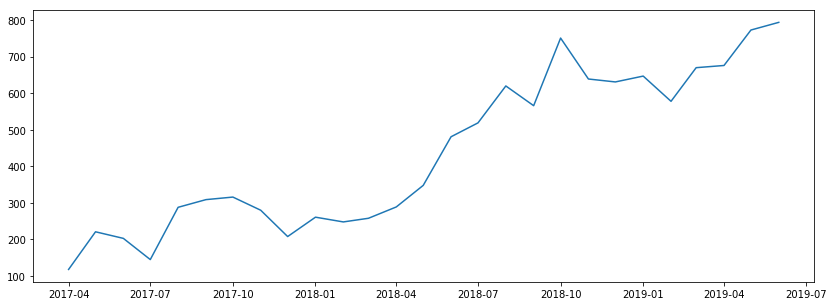

In [651]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts_monthly.index, ts_monthly['route'])

In [95]:
# dfST['timestamp'] = pd.to_datetime(dfST['timestamp'])

In [96]:
# popular_route_count = pd.DataFrame(popular_route.groupby(
#     ['Date'])['route'].count()).reset_index()

In [97]:
# popular_route_count

In [652]:
ts_monthly.reset_index(inplace=True)

In [653]:
ts_df = ts_monthly.rename(columns={'Date': 'ds',
                        'route': 'y'})

ts_df.tail()

,ds,y
22,2019-02-01,578
23,2019-03-01,670
24,2019-04-01,676
25,2019-05-01,773
26,2019-06-01,794


In [654]:
Model = proph(interval_width=0.95) 
Model.fit(ts_df)
future_dates = Model.make_future_dataframe(periods=6, freq='MS')
forecast = Model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


In [655]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend
21,2019-01-01,646.682372,611.822297,679.989793,614.483144
22,2019-02-01,586.355348,553.078486,618.894902,647.026036
23,2019-03-01,684.046336,650.738862,718.305253,676.419616
24,2019-04-01,672.452296,639.144254,706.675895,708.962507
25,2019-05-01,751.807406,719.123825,787.660991,740.455628
26,2019-06-01,810.805308,776.798396,845.468444,772.998520
27,2019-07-01,986.591314,952.138243,1020.077981,804.491641
28,2019-08-01,1004.462705,971.769736,1039.357816,837.034533
29,2019-09-01,842.895315,807.986340,876.603015,869.577425
30,2019-10-01,1181.529162,1145.323556,1218.979499,901.070546


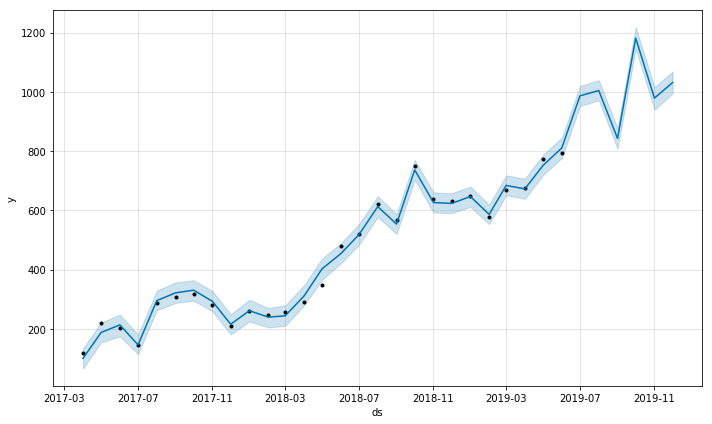

In [656]:
Model.plot(forecast, uncertainty=True)
plt.show()

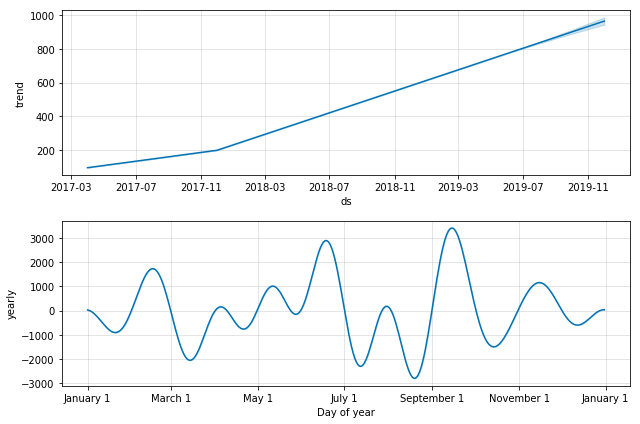

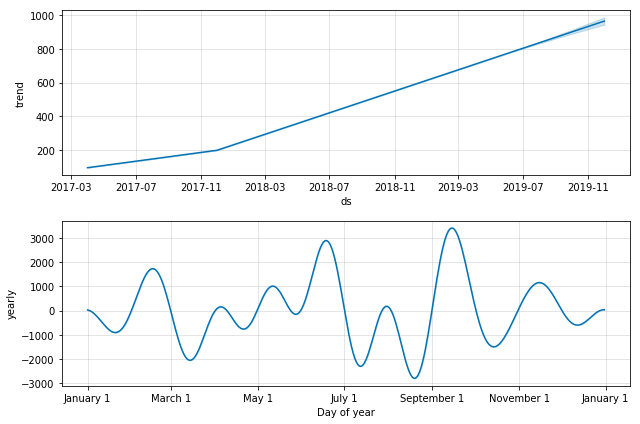

In [657]:
Model.plot_components(forecast)

In [932]:
ts_monthly1['route']['2017-01-01':'2017-03-01']

Series([], Name: route, dtype: int64)

In [934]:

#
print("2017 Q2 total trip:", ts_monthly1['route']['2017-04-01':'2017-06-01'].sum())
print("2018 Q2 total trip:", ts_monthly1['route']['2018-04-01':'2018-06-01'].sum())
# print("2018 Q1 total trip:", ts_monthly1['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2018 Q2 Demand increased by: {round((1118/542)*50,2)}%")
print("\n")
print("2017 Q3 total trip:", ts_monthly1['route']['2017-07-01':'2017-09-01'].sum())
print("2018 Q3 total trip:", ts_monthly1['route']['2018-07-01':'2018-09-01'].sum())
print(f"In 2018 Q3 Demand increased by: {round((1705/742)*50,2)}%")
print("\n")
print("2017 Q4 total trip:", ts_monthly1['route']['2017-10-01':'2017-12-01'].sum())
print("2018 Q4 total trip:", ts_monthly1['route']['2018-10-01':'2018-12-01'].sum())
print(f"In 2018 Q4 Demand increased by: {round((2021/804)*50,2)}%")
print("\n")
print("2018 Q1 total trip:", ts_monthly1['route']['2018-01-01':'2018-03-01'].sum())
print("2019 Q1 total trip:", ts_monthly1['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2019 Q1 Demand increased by: {round((1895/767)*50,2)}%")
print("\n")
print("2018 Q2 total trip:", ts_monthly1['route']['2018-04-01':'2018-06-01'].sum())
print("2019 Q2 total trip:", ts_monthly1['route']['2019-04-01':'2019-06-01'].sum())
print(f"In 2019 Q2 Demand increased by: {round((2913/1376)*50,2)}%")

2017 Q2 total trip: 542
2018 Q2 total trip: 1118
In 2018 Q2 Demand increased by: 103.14%


2017 Q3 total trip: 742
2018 Q3 total trip: 1705
In 2018 Q3 Demand increased by: 114.89%


2017 Q4 total trip: 804
2018 Q4 total trip: 2021
In 2018 Q4 Demand increased by: 125.68%


2018 Q1 total trip: 767
2019 Q1 total trip: 1895
In 2019 Q1 Demand increased by: 123.53%


2018 Q2 total trip: 1118
2019 Q2 total trip: 2243
In 2019 Q2 Demand increased by: 105.85%


In [674]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(Model, horizon = "30 days")
df_p = performance_metrics(df_cv)
df_p.head(5)


INFO:fbprophet:Making 29 forecasts with cutoffs between 2018-04-05 00:00:00 and 2019-05-30 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,3 days,82.094098,9.060579,7.674960,0.735632
1,4 days,72.260181,8.500599,7.108886,0.804598
2,5 days,69.989322,8.365962,6.910217,0.816092
3,6 days,77.046502,8.777614,6.967627,0.816092
4,7 days,80.831001,8.990606,7.124882,0.758621


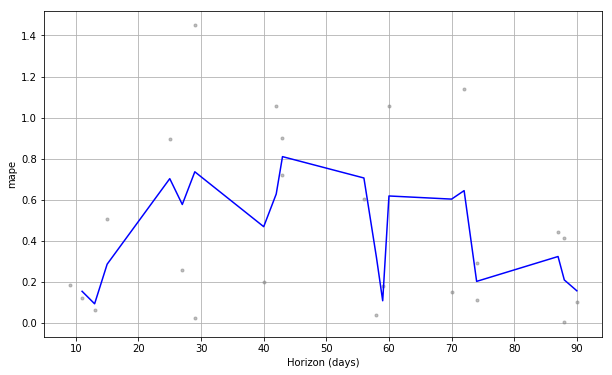

In [661]:
from fbprophet.plot import plot_cross_validation_metric
fig0 = plot_cross_validation_metric(df_cv, metric='mape')

In [608]:
temp_day = popular_route.resample('D')
ts_daily = temp_day.count()

ts_daily = ts_daily[['route']]
ts_daily.head()

,route
Date,
2017-04-03,3
2017-04-04,4
2017-04-05,12
2017-04-06,8
2017-04-07,7


In [609]:
mon_ts = ts_daily['route']['2017-04-03'::7]
tue_ts = ts_daily['route']['2017-04-04'::7]
wed_ts = ts_daily['route']['2017-04-05'::7]
thu_ts = ts_daily['route']['2017-04-06'::7]
fri_ts = ts_daily['route']['2017-04-07'::7]
sat_ts = ts_daily['route']['2017-04-08'::7]
sun_ts = ts_daily['route']['2017-04-09'::7]

In [672]:
sun_ts.index.dayofweek.value_counts()

6    116
Name: Date, dtype: int64

In [610]:
# Sum all days
print(mon_ts.sum())
print(tue_ts.sum())
print(wed_ts.sum())
print(thu_ts.sum())
print(fri_ts.sum())
print(sat_ts.sum())
print(sun_ts.sum())

2091
2539
2610
2515
1970
53
59


In [611]:
# print("2018 q1:",ts_daily['route']['2017-01-01':'2019-03-26':7].mean())
# print("2018 q2:",ts_daily['route']['2018-04-02':'2018-06-25':7].mean())
# print("2019 q1:",ts_daily['route']['2019-01-07':'2019-03-25':7].mean())
# print("2019 q2:",ts_daily['route']['2019-04-01'::7].mean())

In [612]:
# pd.DataFrame(ts_daily['route']['2019-01-07':'2019-03-25':7])

In [613]:
ts_daily_prophet = ts_daily.reset_index()

In [614]:
ts_daily_df = ts_daily_prophet.rename(columns={'Date': 'ds',
                        'route': 'y'})

ts_daily_df.head()

,ds,y
0,2017-04-03,3
1,2017-04-04,4
2,2017-04-05,12
3,2017-04-06,8
4,2017-04-07,7


In [601]:
# ts_daily_df['dayName'] = pd.DatetimeIndex(ts_daily_df['ds']).weekday

In [624]:
# ts_daily_df

In [763]:
# Drop route = 0 which are most likely to be weekend and holidays
# only commuters uses bikes for this route and there are almost no demand during the
# weekend and Holidays
ts_daily_df1 = ts_daily_df.loc[~(ts_daily_df['y']<1)]

In [764]:
ts_daily_df1.shape

(630, 2)

In [765]:
Model = proph(interval_width=0.95, daily_seasonality=True) 
Model.fit(ts_daily_df1)
future_dates = Model.make_future_dataframe(periods=90, freq='D')
forecast = Model.predict(future_dates)

In [766]:
# print(forecast.columns)
forecast[['ds', 'yhat']]

,ds,yhat
0,2017-04-03,2.869768
1,2017-04-04,6.038398
2,2017-04-05,6.357428
3,2017-04-06,5.866287
4,2017-04-07,1.168909
5,2017-04-10,4.018508
6,2017-04-11,7.215067
7,2017-04-12,7.541215
8,2017-04-13,7.037511
9,2017-04-14,2.309430


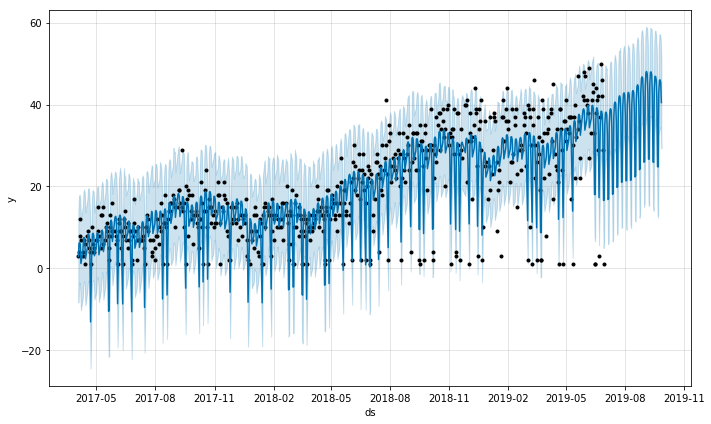

In [767]:
Model.plot(forecast, uncertainty=True)
plt.show()

In [769]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(Model, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.shape
df_p.head(5)

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-04-05 00:00:00 and 2019-03-31 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,10 days,42.340767,6.506978,5.122130,0.441422,0.764977
1,11 days,37.383951,6.114242,5.013447,0.326498,0.760753
2,12 days,40.536633,6.366839,5.270053,0.337011,0.731183
3,13 days,40.891082,6.394614,5.302777,0.314063,0.714286
4,14 days,45.213692,6.724113,5.431312,0.292812,0.701613


In [770]:
# df_cv

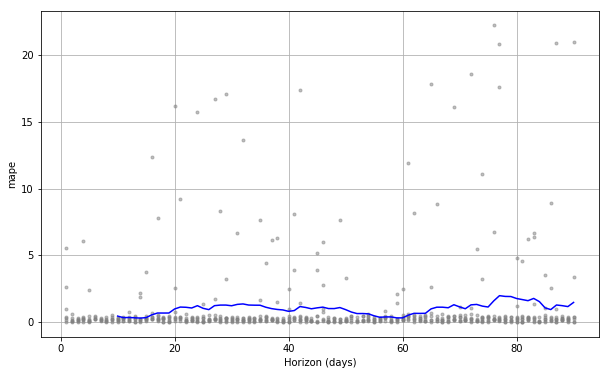

In [771]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv, metric='mape')

In [757]:
# m1 = proph(interval_width=0.95, seasonality_mode='multiplicative') 
# m1.fit(ts_daily_df1[ts_daily_df['ds'].apply(lambda x: x.weekday())>=5])
# future = m1.make_future_dataframe(periods=90, freq='D')
# fcst1 = m1.predict(future)

# m2 = proph(interval_width=0.95, seasonality_mode='multiplicative') 
# m2.fit(ts_daily_df1[ts_daily_df['ds'].apply(lambda x: x.weekday())<5])
# future = m2.make_future_dataframe(periods=90, freq='D')
# fcst2 = m2.predict(future)
# fcst2 = fcst2.append(fcst1)

# fig=m2.plot(fcst2)

In [758]:
# df_cv1 = cross_validation(m2, horizon='90 days')
# df_p = performance_metrics(df_cv1)
# df_p.shape
# df_p.head(5)

In [759]:
# fig2 = plot_cross_validation_metric(df_cv1, metric='mape')

### Hourly 

In [791]:
temp_hour = popular_route.resample('H')
ts_hourly = temp_hour.count()

ts_hourly = ts_hourly[['route']]
ts_hourly

,route
Date,
2017-04-03 08:00:00,1
2017-04-03 09:00:00,0
2017-04-03 10:00:00,0
2017-04-03 11:00:00,0
2017-04-03 12:00:00,0
2017-04-03 13:00:00,0
2017-04-03 14:00:00,0
2017-04-03 15:00:00,0
2017-04-03 16:00:00,0


In [783]:
mon_ts = ts_daily['route']['2017-04-03'::7]
tue_ts = ts_daily['route']['2017-04-04'::7]
wed_ts = ts_daily['route']['2017-04-05'::7]
thu_ts = ts_daily['route']['2017-04-06'::7]
fri_ts = ts_daily['route']['2017-04-07'::7]
sat_ts = ts_daily['route']['2017-04-08'::7]
sun_ts = ts_daily['route']['2017-04-09'::7]

In [784]:
print(mon_ts.sum())
print(tue_ts.sum())
print(wed_ts.sum())
print(thu_ts.sum())
print(fri_ts.sum())
print(sat_ts.sum())
print(sun_ts.sum())

2091
2539
2610
2515
1970
53
59


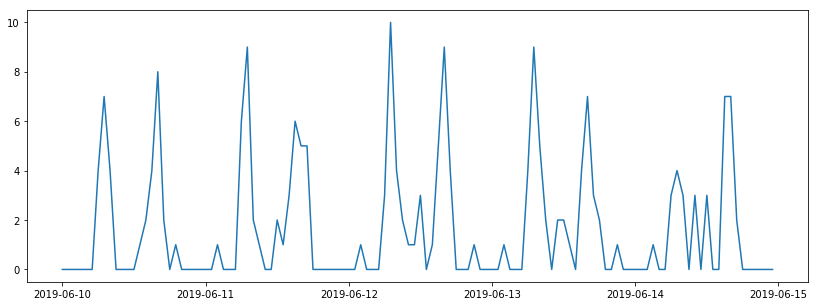

In [390]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts_hourly['2019-06-10':'2019-06-14'].index, ts_hourly['2019-06-10':'2019-06-14']['route'])

In [740]:
# print("Thursday")
# print(ts_hourly['2019-06-13'])
# print("Sum:", ts_hourly['2019-06-13'].route.sum())
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-13'].index, ts_hourly['2019-06-13']['route'])

In [739]:
# print("Thursday")
# print(ts_hourly['2019-06-27'])
# print("Sum:", ts_hourly['2019-06-27'].route.sum())
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-27'].index, ts_hourly['2019-06-27']['route'])

Friday
                     route
Date                      
2019-06-14 00:00:00      0
2019-06-14 01:00:00      0
2019-06-14 02:00:00      0
2019-06-14 03:00:00      1
2019-06-14 04:00:00      0
2019-06-14 05:00:00      0
2019-06-14 06:00:00      3
2019-06-14 07:00:00      4
2019-06-14 08:00:00      3
2019-06-14 09:00:00      0
2019-06-14 10:00:00      3
2019-06-14 11:00:00      0
2019-06-14 12:00:00      3
2019-06-14 13:00:00      0
2019-06-14 14:00:00      0
2019-06-14 15:00:00      7
2019-06-14 16:00:00      7
2019-06-14 17:00:00      2
2019-06-14 18:00:00      0
2019-06-14 19:00:00      0
2019-06-14 20:00:00      0
2019-06-14 21:00:00      0
2019-06-14 22:00:00      0
2019-06-14 23:00:00      0
Sum: 33


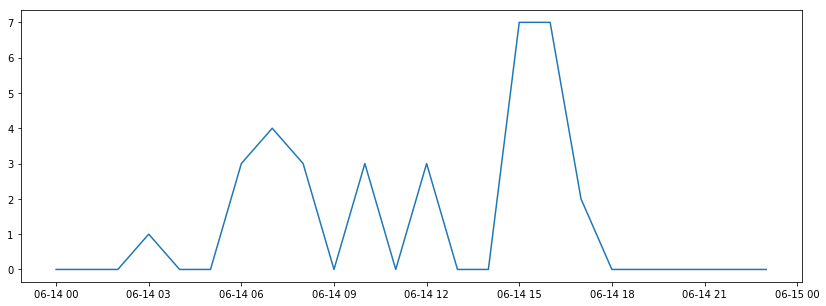

In [393]:
print("Friday")
print(ts_hourly['2019-06-14'])
print("Sum:", ts_hourly['2019-06-14'].route.sum())
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts_hourly['2019-06-14'].index, ts_hourly['2019-06-14']['route'])

Friday
                     route
Date                      
2019-06-28 00:00:00      0
2019-06-28 01:00:00      1
2019-06-28 02:00:00      1
2019-06-28 03:00:00      0
2019-06-28 04:00:00      0
2019-06-28 05:00:00      0
2019-06-28 06:00:00      2
2019-06-28 07:00:00      7
2019-06-28 08:00:00      3
2019-06-28 09:00:00      0
2019-06-28 10:00:00      1
2019-06-28 11:00:00      0
2019-06-28 12:00:00      1
2019-06-28 13:00:00      1
2019-06-28 14:00:00      1
2019-06-28 15:00:00      3
2019-06-28 16:00:00      4
2019-06-28 17:00:00      0
2019-06-28 18:00:00      0
2019-06-28 19:00:00      4
2019-06-28 20:00:00      0
2019-06-28 21:00:00      0
2019-06-28 22:00:00      0
2019-06-28 23:00:00      0
Sum: 29


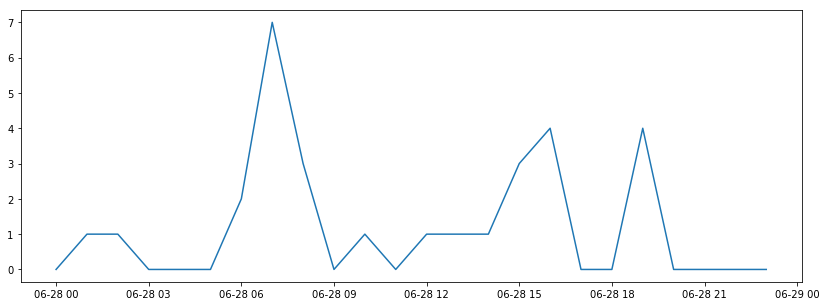

In [394]:
print("Friday")
print(ts_hourly['2019-06-28'])
print("Sum:", ts_hourly['2019-06-28'].route.sum())
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts_hourly['2019-06-28'].index, ts_hourly['2019-06-28']['route'])

In [395]:
ts_hourly['dayName'] = pd.DatetimeIndex(ts_hourly.index).weekday

In [396]:
mon_ts_df = ts_hourly.loc[ts_hourly['dayName']==0]
tue_ts_df = ts_hourly.loc[ts_hourly['dayName']==1]
wed_ts_df = ts_hourly.loc[ts_hourly['dayName']==2]
thu_ts_df = ts_hourly.loc[ts_hourly['dayName']==3]
fri_ts_df = ts_hourly.loc[ts_hourly['dayName']==4]
sat_ts_df = ts_hourly.loc[ts_hourly['dayName']==5]
sun_ts_df = ts_hourly.loc[ts_hourly['dayName']==6]


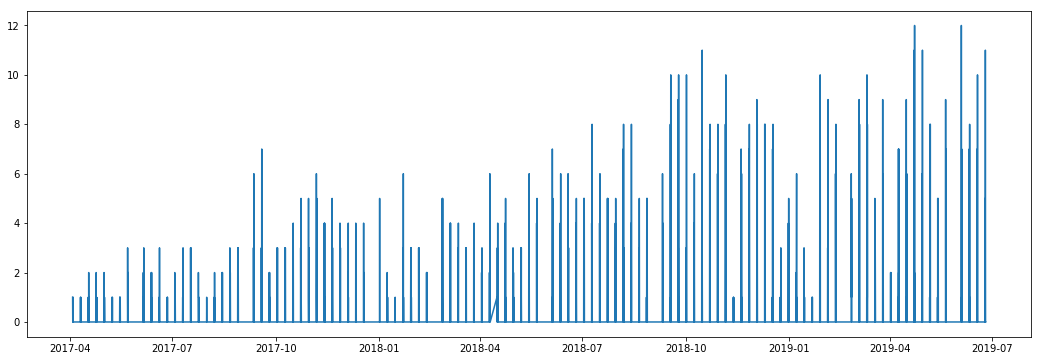

In [397]:
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(mon_ts_df.index, mon_ts_df['route'])

In [693]:
ts_hourly

,route,dayName
Date,,
2017-04-03 08:00:00,1,0
2017-04-03 09:00:00,0,0
2017-04-03 10:00:00,1,0
2017-04-03 11:00:00,0,0
2017-04-03 12:00:00,0,0
2017-04-03 13:00:00,0,0
2017-04-03 14:00:00,0,0
2017-04-03 15:00:00,1,0
2017-04-03 16:00:00,0,0


In [398]:
mon_ts_df.groupby(mon_ts_df.index)['route'].sum()

Date
2017-04-03 08:00:00     1
2017-04-03 09:00:00     0
2017-04-03 10:00:00     1
2017-04-03 11:00:00     0
2017-04-03 12:00:00     0
2017-04-03 13:00:00     0
2017-04-03 14:00:00     0
2017-04-03 15:00:00     1
2017-04-03 16:00:00     0
2017-04-03 17:00:00     0
2017-04-03 18:00:00     0
2017-04-03 19:00:00     0
2017-04-03 20:00:00     0
2017-04-03 21:00:00     0
2017-04-03 22:00:00     0
2017-04-03 23:00:00     0
2017-04-10 00:00:00     0
2017-04-10 01:00:00     0
2017-04-10 02:00:00     0
2017-04-10 03:00:00     0
2017-04-10 04:00:00     0
2017-04-10 05:00:00     0
2017-04-10 06:00:00     0
2017-04-10 07:00:00     0
2017-04-10 08:00:00     1
2017-04-10 09:00:00     0
2017-04-10 10:00:00     0
2017-04-10 11:00:00     0
2017-04-10 12:00:00     0
2017-04-10 13:00:00     0
                       ..
2019-06-17 18:00:00     0
2019-06-17 19:00:00     0
2019-06-17 20:00:00     0
2019-06-17 21:00:00     0
2019-06-17 22:00:00     0
2019-06-17 23:00:00     0
2019-06-24 00:00:00     0
2019-06

In [114]:
# print("Monday")
# print(ts_hourly['2019-06-24'])
# print("Sum:", ts_hourly['2019-06-24'].route.sum())
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-24'].index, ts_hourly['2019-06-24']['route'])

In [399]:
mon_ts_df.drop(columns='dayName', inplace=True)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Getting only hourly data

In [ ]:
# df_mon_ts_hour.reset_index(inplace=True)

In [402]:
# mon_ts_df = pd.DatetimeIndex(mon_ts_df['Date']).hour

In [404]:
# mon_ts_df_hour = mon_ts_df.copy()
# mon_ts_df_hour.set_index('Date', inplace=True)
# mon_ts_df_hour.head()

In [792]:
ts_hourly.head()

,route
Date,
2017-04-03 08:00:00,1
2017-04-03 09:00:00,0
2017-04-03 10:00:00,0
2017-04-03 11:00:00,0
2017-04-03 12:00:00,0


In [695]:
hours = ts_hourly.index.hour

In [698]:
hourly_ts = pd.concat([ts_hourly, pd.DataFrame(hours, index=ts_hourly.index)], axis=1)

In [700]:
hourly_ts.rename(columns={'Date': 'Time'}, inplace=True)

In [708]:
hourly_ts.head()

,route,dayName,Time
Date,,,
2017-04-03 08:00:00,1,0,8
2017-04-03 09:00:00,0,0,9
2017-04-03 10:00:00,1,0,10
2017-04-03 11:00:00,0,0,11
2017-04-03 12:00:00,0,0,12


In [710]:
hourly_ts.reset_index(inplace=True)

In [711]:
mon_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==0]
tue_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==1]
wed_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==2]
thu_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==3]
fri_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==4]
sat_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==5]
sun_hourly_ts = hourly_ts.loc[hourly_ts['dayName']==6]

In [736]:
mon_hourly_ts.drop(columns='dayName', inplace=True)
tue_hourly_ts.drop(columns='dayName', inplace=True)
wed_hourly_ts.drop(columns='dayName', inplace=True)
thu_hourly_ts.drop(columns='dayName', inplace=True)
fri_hourly_ts.drop(columns='dayName', inplace=True)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [737]:
thu_hourly_ts.set_index('Date').groupby(['Time']).sum()

,route
Time,
0,1
1,1
2,28
3,3
4,6
5,28
6,180
7,421
8,333


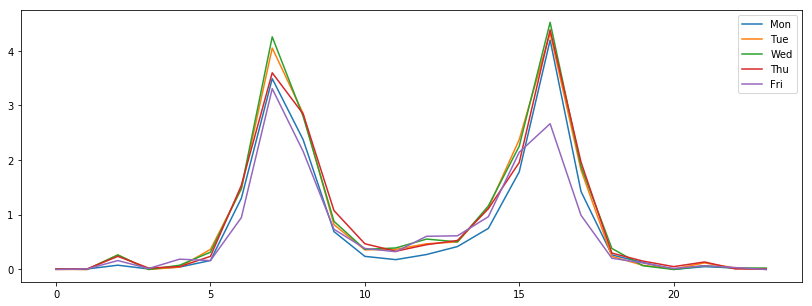

In [738]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(mon_hourly_ts.set_index('Date').groupby(['Time']).mean(), label='Mon')
ax.plot(tue_hourly_ts.set_index('Date').groupby(['Time']).mean(), label='Tue')
ax.plot(wed_hourly_ts.set_index('Date').groupby(['Time']).mean(), label='Wed')
ax.plot(thu_hourly_ts.set_index('Date').groupby(['Time']).mean(), label='Thu')
ax.plot(fri_hourly_ts.set_index('Date').groupby(['Time']).mean(), label='Fri')
ax.legend()

In [405]:
# hours = mon_ts_hour.index.hour

In [406]:
# df_mon_ts_hour = pd.concat([mon_ts_hour, pd.DataFrame(hours, index=mon_ts_hour.index)], axis=1)

In [407]:
# df_mon_ts_hour.head(1)

,route,Date
Date,,
2017-04-03 08:00:00,1,8


In [408]:
df_mon_ts_hour.rename(columns={'Date': 'Time'}, inplace=True)

In [447]:
df_mon_ts_hour.reset_index(inplace=True)

In [455]:
df_mon_ts_hour.set_index('Date').groupby(['Time']).mean()

,route
Time,
0,0.001232
1,0.001232
2,0.011084
3,0.001232
4,0.006158
5,0.023399
6,0.185961
7,0.498768
8,0.341943


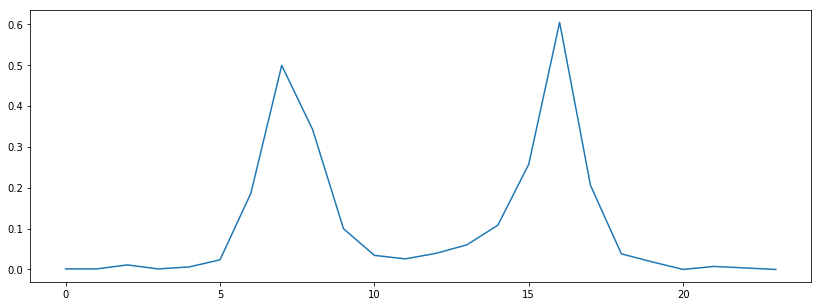

In [457]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(df_mon_ts_hour.set_index('Date').groupby(['Time']).mean())

In [449]:
# df_mon_ts_hour['Date'] = pd.to_datetime(df_mon_ts_hour['Date'])
# df_test = df_mon_ts_hour.resample('60min', on='Date').mean()

In [495]:
# df_mon_ts_hour.resample(rule='24H', closed='left', label='left', base=11).sum()

In [470]:
# temp_hour = df_mon_ts_hour.resample('Hour')
# df_mon_ts_hour = temp_hour.sum()

In [338]:
temp_hour = mon_ts_df_hour.resample('H')
mon_ts_hour = temp_hour.sum()

In [463]:
mon_ts_df_hour

,route
Date,
2017-04-03 08:00:00,1
2017-04-03 09:00:00,0
2017-04-03 10:00:00,1
2017-04-03 11:00:00,0
2017-04-03 12:00:00,0
2017-04-03 13:00:00,0
2017-04-03 14:00:00,0
2017-04-03 15:00:00,1
2017-04-03 16:00:00,0


In [464]:
temp = mon_ts_df.resample('W')
mon_ts_daily = temp.sum()

In [474]:
mon_ts_daily.head()

,route
Date,
2017-04-09,3
2017-04-16,3
2017-04-23,8
2017-04-30,4
2017-05-07,7


In [479]:
print(mon_ts_daily['route']['2018-01-01':'2018-03-01'].sum())
print(mon_ts_daily['route']['2018-04-01':'2018-06-01'].sum())
print(mon_ts_daily['route']['2019-01-01':'2019-03-01'].sum())
print(mon_ts_daily['route']['2019-04-01':'2019-06-01'].sum())

65
119
144
250


In [492]:
# mon_ts_daily['route']['2019-04-01'::]

In [190]:
# mon_ts_daily.reset_index(inplace=True)

In [491]:
# mon_ts_df1 = mon_ts_daily.rename(columns={'Date': 'ds',
#                         'route': 'y'})

# mon_ts_df1.tail(24)

In [193]:
Model = proph(interval_width=0.95) 
Model.fit(mon_ts_df1)
future_dates_mon = Model.make_future_dataframe(periods=24, freq='W')
forecast_mon = Model.predict(future_dates_mon)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [196]:
forecast_mon[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend']].tail(30)

,ds,yhat,yhat_lower,yhat_upper,trend
111,2019-05-26,28.468230,13.999009,42.020819,32.555668
112,2019-06-02,29.641372,14.513304,42.863316,32.832896
113,2019-06-09,31.492350,16.604586,45.037045,33.110125
114,2019-06-16,33.131443,19.062361,47.829786,33.387353
115,2019-06-23,34.511991,20.022773,48.911710,33.664582
116,2019-06-30,35.563935,21.039635,49.284980,33.941810
117,2019-07-07,35.777351,21.896579,49.578489,34.219039
118,2019-07-14,35.053212,21.409963,48.921253,34.496267
119,2019-07-21,34.524295,20.369564,47.741767,34.773495
120,2019-07-28,35.730494,22.327210,49.744359,35.050724


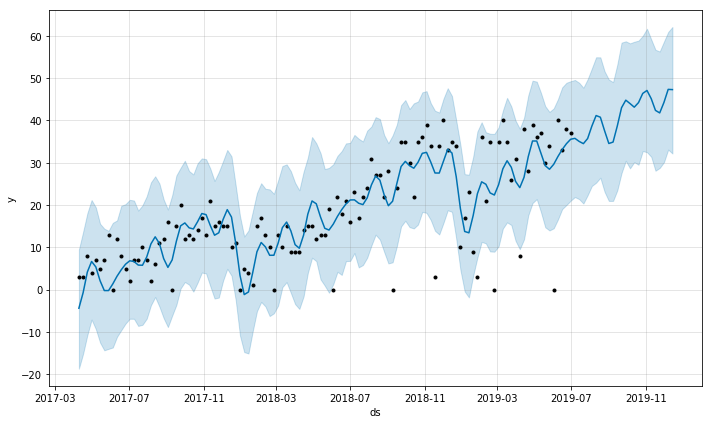

In [197]:
Model.plot(forecast_mon, uncertainty=True)
plt.show()

In [215]:
ts_monthly1 = ts_monthly.set_index('Date')

In [268]:
# print(ts_monthly1['2018-01-01':'2018-06-30'].shape)
# ts_2018 = ts_monthly1['2018-01-01':'2018-06-30']

# print(ts_monthly1['2019-01-01':'2019-06-30'].shape)
# ts_2019 = ts_monthly1['2019-01-01':'2019-06-30']

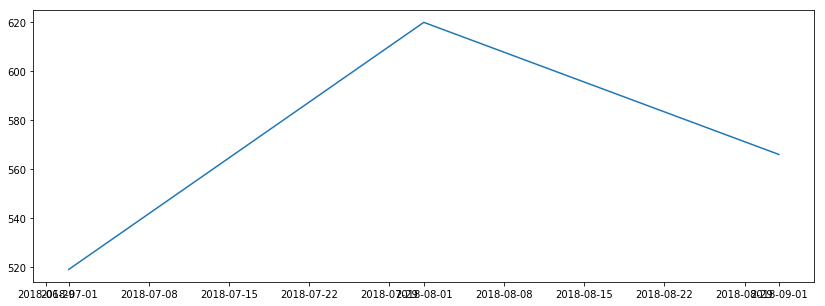

In [302]:
fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_monthly1['2017-07-01':'2017-09-01'], ts_monthly1['route']['2017-07-01':'2017-09-01'])
# ax.plot(ts_monthly1['2018-07-01':'2018-09-01'], ts_monthly1['route']['2018-07-01':'2018-09-01'])
plt.plot(ts_monthly1['route']['2018-07-01':'2018-09-01'])

In [288]:
print("2017 Q2 total trip:", ts_monthly1['route']['2017-04-01':'2017-06-01'].sum())
# print("2018 Q1 total trip:", ts_monthly1['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2018 Q2 Demand increased by: {round((1118/542)*50,2)}%")
print("\n")
print("2017 Q3 total trip:", ts_monthly1['route']['2017-07-01':'2017-09-01'].sum())
print("2018 Q3 total trip:", ts_monthly1['route']['2018-07-01':'2018-09-01'].sum())
print(f"In 2018 Q3 Demand increased by: {round((1705/742)*50,2)}%")
print("\n")
print("2017 Q4 total trip:", ts_monthly1['route']['2017-10-01':'2017-12-01'].sum())
print("2018 Q4 total trip:", ts_monthly1['route']['2018-10-01':'2018-12-01'].sum())
print(f"In 2018 Q4 Demand increased by: {round((2021/804)*50,2)}%")
print("\n")
print("2018 Q1 total trip:", ts_monthly1['route']['2018-01-01':'2018-03-01'].sum())
print("2019 Q1 total trip:", ts_monthly1['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2019 Q1 Demand increased by: {round((1895/767)*50,2)}%")
print("\n")
print("2018 Q2 total trip:", ts_monthly1['route']['2018-04-01':'2018-06-01'].sum())
print("2019 Q2 total trip:", ts_monthly1['route']['2019-04-01':'2019-06-01'].sum())
print(f"In 2019 Q2 Demand increased by: {round((2913/1376)*50,2)}%")

2017 Q2 total trip: 542
In 2018 Q2 Demand increased by: 103.14%


2017 Q3 total trip: 742
2018 Q3 total trip: 1705
In 2018 Q3 Demand increased by: 114.89%


2017 Q4 total trip: 804
2018 Q4 total trip: 2021
In 2018 Q4 Demand increased by: 125.68%


2018 Q1 total trip: 767
2019 Q1 total trip: 1895
In 2019 Q1 Demand increased by: 123.53%


2018 Q2 total trip: 1118
2019 Q2 total trip: 2243
In 2019 Q2 Demand increased by: 105.85%


In [310]:
ts_hourly.head(1)

,route,dayName
Date,,
2017-04-03 08:00:00,1,0


In [316]:
ts_hourly1 = ts_hourly.drop(columns='dayName')
ts_hourly1.head(50)

,route
Date,
2017-04-03 08:00:00,1
2017-04-03 09:00:00,0
2017-04-03 10:00:00,1
2017-04-03 11:00:00,0
2017-04-03 12:00:00,0
2017-04-03 13:00:00,0
2017-04-03 14:00:00,0
2017-04-03 15:00:00,1
2017-04-03 16:00:00,0


In [ ]:
temp_hour2 = ts_hourly1.resample('H')
ts_hourly2 = temp_hour2.sum()

In [ ]:
merged_df.loc[merged_df[]]

In [202]:
merged_df1 = merged_df.set_index('Date')

In [211]:
print(merged_df1['2018-01-01':'2018-06-30'].shape)
df_2018 = merged_df1['2018-01-01':'2018-06-30']

(137519, 25)


In [212]:
print(merged_df1['2019-01-01':'2019-06-30'].shape)
df_2019 = merged_df1['2019-01-01':'2019-06-30']

(114087, 25)


In [213]:
df_2018.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:04:00,5889,0,21,34.043732,-118.260139,3018.0,0.0,2018-01-01 00:25:00,Walk-up,0.0,...,65406367,One Way,0,0,4,Olive & 5th,Central LA,Grand & Olympic,Central LA,Olive & 5th-->Grand & Olympic
2018-01-01 00:05:00,6311,0,20,34.043732,-118.260139,3018.0,0.0,2018-01-01 00:25:00,Walk-up,0.0,...,65406366,One Way,0,0,5,Olive & 5th,Central LA,Grand & Olympic,Central LA,Olive & 5th-->Grand & Olympic
2018-01-01 00:06:00,5753,0,19,34.043732,-118.260139,3018.0,0.0,2018-01-01 00:25:00,Walk-up,0.0,...,65406365,One Way,0,0,6,Olive & 5th,Central LA,Grand & Olympic,Central LA,Olive & 5th-->Grand & Olympic
2018-01-01 00:13:00,6220,0,22,34.044701,-118.252441,3031.0,0.0,2018-01-01 00:35:00,Monthly Pass,30.0,...,65406364,One Way,0,0,13,Grand & Olympic,Central LA,7th & Spring,Central LA,Grand & Olympic-->7th & Spring
2018-01-01 00:14:00,12436,0,45,34.023392,-118.479637,4216.0,0.0,2018-01-01 00:59:00,Monthly Pass,30.0,...,65406362,One Way,0,0,14,Washington & Abbot Kinney,Westside,17th St / SMC Expo Line Station,Westside,Washington & Abbot Kinney-->17th St / SMC Expo...


# Classification

In [676]:
print(popular_route.columns)
print(popular_route.shape)
popular_route.head(1)

Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'dayName', 'hour', 'minute', 'station_name_start', 'region_start',
       'station_name_end', 'region_end', 'route'],
      dtype='object')
(11837, 25)


,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-27 04:36:00,5715,0,4,34.051941,-118.24353,3030.0,0.0,2017-06-27 04:40:00,Monthly Pass,30.0,...,32977927,One Way,1,4,36,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st


In [683]:
popular_route.passholder_type.value_counts()

Monthly Pass    11368
Walk-up           350
Flex Pass          77
One Day Pass       28
Annual Pass        14
Name: passholder_type, dtype: int64

# Scraping Live status of stations  

In [752]:
import requests
response = requests.get("https://bikeshare.metro.net/stations/json/", headers={'User-Agent': 'Mozilla/5.0'})
stations = response.json()

In [754]:
stations['features']

[{'geometry': {'coordinates': [-118.25854, 34.0485], 'type': 'Point'},
  'properties': {'addressStreet': '723 Flower Street',
   'addressCity': 'Los Angeles',
   'addressState': 'CA',
   'addressZipCode': '90017',
   'bikesAvailable': 22,
   'closeTime': '05:39:00',
   'docksAvailable': 4,
   'eventEnd': None,
   'eventStart': None,
   'isEventBased': False,
   'isVirtual': False,
   'isVisible': False,
   'kioskId': 3005,
   'kioskPublicStatus': 'Active',
   'kioskStatus': 'FullService',
   'name': '7th & Flower',
   'notes': None,
   'openTime': '05:45:00',
   'publicText': '',
   'timeZone': 'Pacific Standard Time',
   'totalDocks': 27,
   'trikesAvailable': 0,
   'kioskConnectionStatus': 'Active',
   'kioskType': 1,
   'latitude': 34.0485,
   'longitude': -118.25854,
   'hasGeofence': False,
   'classicBikesAvailable': 19,
   'smartBikesAvailable': 0,
   'electricBikesAvailable': 3,
   'isArchived': False},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-118.25667, 34.04554],

In [772]:
merged_df.loc[merged_df['station_name_start']=='Union Station West Portal']

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
33042,4728,0,20,34.048500,-118.258537,3005.0,0.0,2017-05-02 18:08:00,Walk-up,0.0,...,One Way,2017-05-02 17:48:00,1,17,48,Union Station West Portal,Central LA,7th & Flower,Central LA,Union Station West Portal-->7th & Flower
33060,4728,0,21,34.040989,-118.255798,3033.0,0.0,2017-05-07 11:32:00,Monthly Pass,30.0,...,One Way,2017-05-07 11:11:00,6,11,11,Union Station West Portal,Central LA,Main & 9th,Central LA,Union Station West Portal-->Main & 9th
33067,4728,0,9,34.046822,-118.248352,3038.0,0.0,2017-04-04 19:27:00,Monthly Pass,30.0,...,One Way,2017-04-04 19:18:00,1,19,18,Union Station West Portal,Central LA,Main & 5th,Central LA,Union Station West Portal-->Main & 5th
33071,4728,0,52,34.039188,-118.232529,3036.0,0.0,2017-04-20 18:15:00,Flex Pass,365.0,...,One Way,2017-04-20 17:23:00,3,17,23,Union Station West Portal,Central LA,Willow St & Mateo St,Central LA,Union Station West Portal-->Willow St & Mateo St
33078,4728,0,14,34.038609,-118.260857,3019.0,0.0,2017-04-13 07:05:00,Monthly Pass,30.0,...,One Way,2017-04-13 06:51:00,3,6,51,Union Station West Portal,Central LA,12th & Hill,Central LA,Union Station West Portal-->12th & Hill
33080,4728,0,19,34.050911,-118.240967,3023.0,0.0,2017-04-19 13:12:00,Monthly Pass,30.0,...,One Way,2017-04-19 12:53:00,2,12,53,Union Station West Portal,Central LA,1st & Judge John Aiso,Central LA,Union Station West Portal-->1st & Judge John Aiso
33099,4728,0,28,34.044159,-118.251579,3055.0,0.0,2017-05-22 22:35:00,Monthly Pass,30.0,...,One Way,2017-05-22 22:07:00,0,22,7,Union Station West Portal,Central LA,7th & Main,Central LA,Union Station West Portal-->7th & Main
33107,4728,0,19,34.048401,-118.260948,3035.0,0.0,2017-05-23 18:51:00,Monthly Pass,30.0,...,One Way,2017-05-23 18:32:00,1,18,32,Union Station West Portal,Central LA,Figueroa & 8th,Central LA,Union Station West Portal-->Figueroa & 8th
33168,5715,0,4,34.051941,-118.243530,3030.0,0.0,2017-06-27 04:40:00,Monthly Pass,30.0,...,One Way,2017-06-27 04:36:00,1,4,36,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st
33180,5716,0,9,34.041691,-118.235352,3048.0,0.0,2017-06-29 08:35:00,Monthly Pass,30.0,...,One Way,2017-06-29 08:26:00,3,8,26,Union Station West Portal,Central LA,5th & Hewitt,Central LA,Union Station West Portal-->5th & Hewitt


# Stations Demand in each hour
Business problem to solve is to recommend allocations for bikes in certain (popular) location by looking at 
hourly demand for each station.  Find each stations demand volume per hour and see if there is surplus 
that can be allocate those surplus bikes to popular location in order to support the demand

For Users, display live status of stations and display availability of bikes and display how many bikes will be remaining after hour. 

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer

In [256]:
merged_df.set_index('Date', inplace=True)

In [262]:
train = merged_df['2017':'2018']

In [263]:
test = merged_df['2019']

In [264]:
train_df = pd.DataFrame(train.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

In [265]:
test_df = pd.DataFrame(test.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

In [210]:
# df_oneHotEncode = merged_df[['starting_station_id','dayName', 'hour']]

In [253]:
# new_df = pd.DataFrame(merged_df.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

In [283]:
train.groupby(['starting_station_id','dayName', 'hour']).count()['route']

starting_station_id  dayName  hour
3005.0               0        0        22
                              1        15
                              2        15
                              3         9
                              4         8
                              5        23
                              6        23
                              7        31
                              8       157
                              9       106
                              10       96
                              11      120
                              12      196
                              13      193
                              14      142
                              15      152
                              16      141
                              17      293
                              18      402
                              19      334
                              20      209
                              21      145
                              22      100

In [211]:
df_oneHotEncode['starting_station_id'] = df_oneHotEncode.starting_station_id.astype(str)
# df_oneHotEncode['hour'] = df_oneHotEncode.hour.astype(str)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [212]:
df_oneHotEncode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601543 entries, 32894 to 648509
Data columns (total 4 columns):
starting_station_id    601543 non-null object
Date                   601543 non-null datetime64[ns]
dayName                601543 non-null int64
hour                   601543 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.9+ MB


In [213]:
def onehotencode(X):
    """
    One hot encode the categorical variables in the dataframe to convert them to numerical variables.
    """
    X_obj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype == np.dtype('O')]]
    
    X_nonobj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype != np.dtype('O')]]
    
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_obj_ohe = ohe.fit_transform(X_obj)
    
    X_nonobj_df = pd.DataFrame(X_nonobj).reset_index(drop=True) 
    X_obj_ohe_df = pd.DataFrame(X_obj_ohe.todense(), columns=ohe.get_feature_names()).reset_index(drop=True)
    
    X_all = pd.concat([X_nonobj_df, X_obj_ohe_df], axis=1)
   
    return X_all

In [214]:
df_onehot = onehotencode(df_oneHotEncode)

In [215]:
df_oneHotEncode['hour'] = df_oneHotEncode.hour.astype(str)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [216]:
df_oneHotEncode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601543 entries, 32894 to 648509
Data columns (total 4 columns):
starting_station_id    601543 non-null object
Date                   601543 non-null datetime64[ns]
dayName                601543 non-null int64
hour                   601543 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.9+ MB


In [217]:
df_onehot.set_index('Date', inplace=True)

In [218]:
df_onehot.head()

,dayName,hour,x0_3005.0,x0_3006.0,x0_3007.0,x0_3008.0,x0_3010.0,x0_3011.0,x0_3014.0,x0_3016.0,...,x0_4390.0,x0_4396.0,x0_4397.0,x0_4400.0,x0_4401.0,x0_4404.0,x0_4405.0,x0_4408.0,x0_4409.0,x0_4410.0
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-25 20:35:00,6,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 08:41:00,4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 17:39:00,4,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 20:17:00,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
merged_df.head().T

,32894,32895,32896,32897,32898
bike_id,4727,4727,4727,4727,4727
bike_type,0,0,0,0,0
duration,18,25,10,4,17
end_lat,34.0485,34.0311,34.0485,34.0454,34.0485
end_lon,-118.259,-118.267,-118.259,-118.254,-118.259
ending_station_id,3005,3020,3005,3051,3005
end_station_id,0,0,0,0,0
end_time,2017-06-25 20:11:00,2017-06-25 21:00:00,2017-06-16 08:51:00,2017-06-16 17:43:00,2017-06-16 20:34:00
passholder_type,Monthly Pass,Monthly Pass,Monthly Pass,Monthly Pass,Walk-up
plan_duration,30,30,30,30,0


In [241]:
X = df_onehot['2017':'2018']
y = df_onehot['2019']

In [243]:
X

,dayName,hour,x0_3005.0,x0_3006.0,x0_3007.0,x0_3008.0,x0_3010.0,x0_3011.0,x0_3014.0,x0_3016.0,...,x0_4390.0,x0_4396.0,x0_4397.0,x0_4400.0,x0_4401.0,x0_4404.0,x0_4405.0,x0_4408.0,x0_4409.0,x0_4410.0
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-25 20:35:00,6,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 08:41:00,4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 17:39:00,4,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 20:17:00,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-17 09:20:00,5,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-17 10:04:00,5,10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-18 11:06:00,6,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-12 22:54:00,0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [899]:
# test_mon = df_onehot['2019-04-01'::7]

In [219]:
df_onehot

(601543, 189)

In [232]:
94/6362

0.014775227915749764

In [92]:
df_onehot

(601543, 25)

In [238]:
df_onehot[df_onehot['hour']==0].groupby(['hour']).count()

,dayName,x0_3005.0,x0_3006.0,x0_3007.0,x0_3008.0,x0_3010.0,x0_3011.0,x0_3014.0,x0_3016.0,x0_3018.0,...,x0_4390.0,x0_4396.0,x0_4397.0,x0_4400.0,x0_4401.0,x0_4404.0,x0_4405.0,x0_4408.0,x0_4409.0,x0_4410.0
hour,,,,,,,,,,,,,,,,,,,,,
0,6362,6362,6362,6362,6362,6362,6362,6362,6362,6362,...,6362,6362,6362,6362,6362,6362,6362,6362,6362,6362


In [239]:
# test_mon = test_mon.reset_index()
# df_onehot.groupby(['hour']).mean()['x0_3014.0']

In [231]:
df_onehot.groupby(['hour']).sum()['x0_3014.0']

hour
0       94.0
1       90.0
2      157.0
3       42.0
4       80.0
5      237.0
6     1939.0
7     3754.0
8     3445.0
9     1528.0
10     819.0
11     734.0
12     723.0
13     566.0
14     512.0
15     583.0
16     758.0
17     859.0
18     924.0
19     659.0
20     333.0
21     316.0
22     279.0
23     151.0
Name: x0_3014.0, dtype: float64

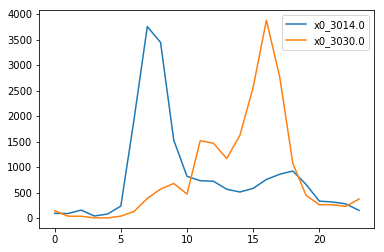

In [893]:
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3014.0'])
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3030.0'])
plt.legend()

In [925]:
df_onehot.groupby(['hour']).sum().loc[6]
# .min().sort_values(ascending=False)

dayName      20779.0
x0_3005.0      161.0
x0_3006.0      153.0
x0_3007.0       30.0
x0_3008.0       50.0
x0_3010.0        2.0
x0_3011.0      100.0
x0_3014.0     1939.0
x0_3016.0       63.0
x0_3018.0       90.0
x0_3019.0       31.0
x0_3020.0       19.0
x0_3022.0       65.0
x0_3023.0       32.0
x0_3024.0       25.0
x0_3025.0       13.0
x0_3026.0       96.0
x0_3027.0       76.0
x0_3028.0       70.0
x0_3029.0       81.0
x0_3030.0      130.0
x0_3031.0      200.0
x0_3032.0       33.0
x0_3033.0       17.0
x0_3034.0      164.0
x0_3035.0       45.0
x0_3036.0       20.0
x0_3037.0       20.0
x0_3038.0      150.0
x0_3040.0       64.0
              ...   
x0_4350.0        1.0
x0_4351.0        0.0
x0_4352.0        0.0
x0_4353.0        0.0
x0_4354.0        2.0
x0_4356.0        0.0
x0_4357.0        0.0
x0_4369.0        0.0
x0_4372.0        0.0
x0_4373.0        0.0
x0_4374.0        0.0
x0_4378.0        2.0
x0_4379.0        0.0
x0_4380.0        0.0
x0_4381.0        0.0
x0_4382.0        0.0
x0_4383.0    

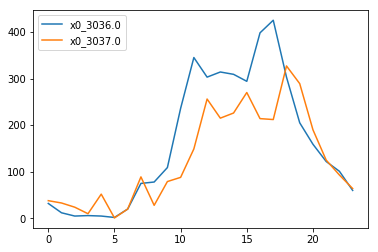

In [926]:
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3036.0'])
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3037.0'])
plt.legend()

In [111]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,4727,0,18,34.048500,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,32815764,One Way,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower
2017-06-25 20:35:00,4727,0,25,34.031052,-118.267090,3020.0,0.0,2017-06-25 21:00:00,Monthly Pass,30.0,...,32821341,One Way,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington
2017-06-16 08:41:00,4727,0,10,34.048500,-118.258537,3005.0,0.0,2017-06-16 08:51:00,Monthly Pass,30.0,...,31652471,One Way,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower
2017-06-16 17:39:00,4727,0,4,34.045422,-118.253517,3051.0,0.0,2017-06-16 17:43:00,Monthly Pass,30.0,...,31700167,One Way,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway
2017-06-16 20:17:00,4727,0,17,34.048500,-118.258537,3005.0,0.0,2017-06-16 20:34:00,Walk-up,0.0,...,31717085,One Way,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower


In [106]:
pivot_df = merged_df[['station_name_start', 'dayName', 'hour']]

In [109]:
pivot_df_transform = pivot_df.pivot_table(index='station_name_start', 
                     columns=['dayName', 'hour'],
                    aggfunc='size').T

In [245]:
pivot_df_transform

station_name_start   Expo/Sepulveda Expo Line Station  11th & Maple  \
dayName hour                                                          
0       0                                         NaN           NaN   
        1                                         NaN           NaN   
        2                                         NaN           1.0   
        3                                         NaN           3.0   
        4                                         NaN           NaN   
        5                                         NaN           NaN   
        6                                         NaN           NaN   
        7                                         NaN           NaN   
        8                                         NaN           1.0   
        9                                         NaN           6.0   
        10                                        NaN           5.0   
        11                                        NaN           7.0   
        12                                        NaN          20.0   
        13                                        NaN          28.0   
        14                                        NaN          21.0   
        15                                        1.0          22.0   
        16                                        NaN          25.0   
        17                                        NaN          36.0   
        18                                        NaN          11.0   
        19                                        1.0          19.0   
        20                                        NaN           2.0   
        21                                        NaN           1.0   
        22                                        NaN           3.0   
        23                                        NaN           1.0   
1       0                                         NaN           2.0   
        1                                         NaN           1.0   
        2                                         NaN           1.0   
        3                                         NaN           NaN   
        4                                         NaN           NaN   
        5                                         NaN           1.0   
...                                               ...           ...   
5       18                                        NaN          20.0   
        19                                        NaN           7.0   
        20                                        NaN          11.0   
        21                                        NaN           NaN   
        22                                        NaN           7.0   
        23                                        NaN           1.0   
6       0                                         NaN           2.0   
        1                                         NaN           4.0   
        2                                         NaN           NaN   
        3                                         NaN           NaN   
        4                                         NaN           NaN   
        5                                         NaN           1.0   
        6                                         NaN           NaN   
        7                                         NaN           NaN   
        8                                         NaN           3.0   
        9                                         NaN           8.0   
        10                                        NaN           NaN   
        11                                        1.0           6.0   
        12                                        NaN          18.0   
        13                                        NaN          21.0   
        14                                        NaN          13.0   
        15                                        1.0          22.0   
        16                                        NaN          26.0   
        17              

In [130]:
pivot_df_transform.T[0][8].sort_values(ascending=False)

station_name_start
Union Station West Portal                                 627.0
1st & Central                                             310.0
Traction & Rose                                           233.0
7th & Flower                                              223.0
7th & Spring                                              199.0
Main & 6th                                                190.0
Spring & College                                          176.0
Hope & 11th                                               172.0
Main & 5th                                                149.0
Grand & 7th                                               145.0
Grand & 3rd                                               123.0
Wilshire & Witmer                                         122.0
Park & Echo Park                                          115.0
7th & Main                                                114.0
2nd & Figueroa                                            111.0
Main & 1st           

In [120]:
pivot_df_transform.T[0][6].sort_values(ascending=True)[0:50]

station_name_start
Rose Bowl                          1.0
Lake & Merrett                     1.0
Lake & Union                       1.0
Los Robles & Cordova               1.0
Palms & National                   1.0
Rose & Rennie                      1.0
Factory Place & Alameda            1.0
Severance & Adams                  1.0
Grand / LATTC                      1.0
Temple & Vignes                    1.0
Union & 7th                        1.0
Venice & Glendon                   1.0
25th & Vermont                     1.0
Figueroa & McCarthy Way            1.0
Westlake & 3rd                     1.0
17th St / SMC Expo Line Station    1.0
Lake & Locust                      1.0
Kenmore & 3rd                      1.0
Grand & Washington                 2.0
Fair Oaks & Mercantile Alley       2.0
Imperial & 7th                     2.0
Union & Olympic                    2.0
Venice & Lincoln                   2.0
Willow St & Mateo St               2.0
Shatto Pl & Wilshire               2.0
Del Ma

In [125]:
pivot_df_transform.T[0][6].sort_values(ascending=True)['3rd & Santa Fe']

8.0